## 2. Data Preparation
### a. Normalize Dates

In [1]:
import pandas as pd
import numpy as np

# Stock price data
stock_path = r"C:\Users\Dell\Pictures\Predicting-Price-Moves-with-News-Sentiment-week1\data\AAPL.csv"
df_stock = pd.read_csv(stock_path, parse_dates=['Date'])

# News dataset
news_path = r"C:\Users\Dell\Pictures\Predicting-Price-Moves-with-News-Sentiment-week1\data\raw_analyst_ratings.csv"
df_news = pd.read_csv(news_path, parse_dates=['date'])



In [2]:
df_news

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


In [3]:
df_stock

,Date,Close,High,Low,Open,Volume
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800
...,...,...,...,...,...,...
3769,2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600
3770,2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300
3771,2023-12-27,191.342972,191.689703,189.302247,190.689158,48087700
3772,2023-12-28,191.768951,192.838849,191.362784,192.323710,34049900


## Step 2 — Normalize Dates

In [4]:
# Make sure both datasets have datetime dates only (remove time if present)
df_stock['Date'] = df_stock['Date'].dt.normalize()

# Convert 'date' column to datetime
df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce')

# Drop rows where conversion failed (optional)
df_news = df_news.dropna(subset=['date'])

# Now normalize the dates (remove time component)
df_news['date'] = df_news['date'].dt.normalize()



C:\Users\Dell\AppData\Local\Temp\ipykernel_13744\985940330.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['date'] = df_news['date'].dt.normalize()


In [5]:
from textblob import TextBlob

# Compute sentiment scores for each headline
df_news['sentiment'] = df_news['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Aggregate by day
daily_sentiment = df_news.groupby('date')['sentiment'].mean().reset_index()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13744\1194191696.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['sentiment'] = df_news['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)


## b. Sentiment Analysis

In [6]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply to all news headlines
df_news['sentiment'] = df_news['headline'].apply(get_sentiment)

# Aggregate daily sentiment (average if multiple articles per day)
daily_sentiment = df_news.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.rename(columns={'sentiment': 'avg_sentiment'}, inplace=True)

daily_sentiment.head()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13744\2381279310.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['sentiment'] = df_news['headline'].apply(get_sentiment)


,date,avg_sentiment
0,2011-04-27 00:00:00-04:00,0.000000
1,2011-04-28 00:00:00-04:00,0.068182
2,2011-04-29 00:00:00-04:00,0.166667
3,2011-04-30 00:00:00-04:00,0.500000
4,2011-05-01 00:00:00-04:00,0.000000


## 3. Calculate Stock Movements
### a. Daily Returns

In [7]:
# Daily percentage change
df_stock['daily_return'] = df_stock['Close'].pct_change()

# Keep only trading days that have news
df_stock = df_stock[['Date', 'daily_return']]
df_stock.dropna(inplace=True)



C:\Users\Dell\AppData\Local\Temp\ipykernel_13744\990564239.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock.dropna(inplace=True)


## b. Merge Data

In [ ]:
df_stock['date'] = pd.to_datetime(df_stock['date']).dt.tz_localize(None)
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date']).dt.tz_localize(None)

df_merged = pd.merge(df_stock, daily_sentiment, on='date', how='inner')

C:\Users\Dell\AppData\Local\Temp\ipykernel_13744\4070272924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock['date'] = pd.to_datetime(df_stock['date']).dt.tz_localize(None)


In [17]:
df_merged

,date,daily_return,sentiment
0,2011-04-27,-0.000770,0.000000
1,2011-04-28,-0.009710,0.068182
2,2011-04-29,0.009748,0.166667
3,2011-05-02,-0.010997,-0.009259
4,2011-05-03,0.005545,0.000000
...,...,...,...
2221,2020-06-05,0.028481,0.110735
2222,2020-06-08,0.005913,0.059971
2223,2020-06-09,0.031578,0.018338
2224,2020-06-10,0.025728,-0.009177


In [19]:
print(df_merged.columns)


Index(['date', 'daily_return', 'sentiment'], dtype='object')


## 4. Correlation Analysis
### a. Pearson Correlation

In [20]:
# Pearson correlation between daily return and sentiment
correlation = df_merged['daily_return'].corr(df_merged['sentiment'], method='pearson')
print("Pearson correlation:", correlation)

Pearson correlation: -0.0028148910023683372


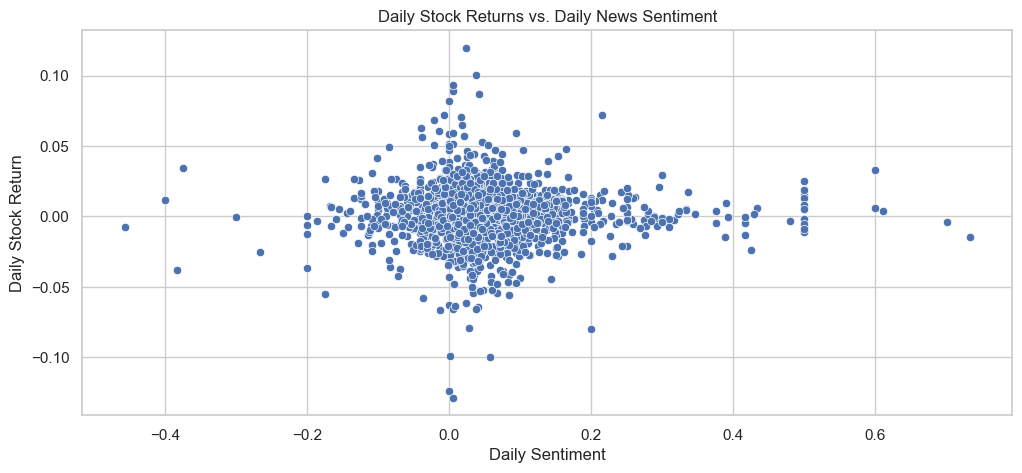

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(12,5))
sns.scatterplot(x='sentiment', y='daily_return', data=df_merged)
plt.title('Daily Stock Returns vs. Daily News Sentiment')
plt.xlabel('Daily Sentiment')
plt.ylabel('Daily Stock Return')
plt.show()
